In [ ]:
import os
import sys
import requests
import pandas as pd
import matplotlib.pyplot as plt
# Plot portfolio_total_value with formatted y-axis ticks for readability
import matplotlib.ticker as mticker

# Set the notebook to the root directory
ROOT_DIR = os.path.abspath(os.path.join(".."))
sys.path.insert(0, ROOT_DIR)

# Define the local endpoint
endpoint = f"http://127.0.0.1:8000/portfolio_valuation/get_daily_portfolio_snapshot/?start_date=2023-01-01&end_date=2023-06-30"

# Make a GET request to the local endpoint
response = requests.get(endpoint)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract the 'data' part
    df = pd.DataFrame(data["data"])
    # Convert numeric columns from strings to float (if needed)
    numeric_columns = ["nav_per_unit"]
    df[numeric_columns] = df[numeric_columns].astype(float)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")



In [109]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd



# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Plot total_value
fig.add_trace(go.Scatter(x=df['date'], y=pd.to_numeric(df['total_value']), mode='lines',
                         name='Fund Total Value', line=dict(color='blue')),
              row=1, col=1)
fig.update_yaxes(title_text='Fund Value', row=1, col=1)

# Plot nav_per_unit
fig.add_trace(go.Scatter(x=df['date'], y=df['nav_per_unit'], mode='lines',
                         name='NAV per Unit', line=dict(color='orange')),
              row=2, col=1)
fig.update_yaxes(title_text='NAV per Unit', row=2, col=1)
fig.update_xaxes(title_text='Date', row=2, col=1)


# Plot portfolio_total_value
fig.add_trace(go.Scatter(x=df['date'], y=pd.to_numeric(df['portfolio_total_value']), mode='lines',
                         name='Portfolio Total Value', line=dict(color='green')), # Changed color for distinction
              row=3, col=1)
fig.update_yaxes(title_text='Portfolio Total Value', row=3, col=1, tickformat=",.0f") # Format with thousands separator
fig.update_xaxes(title_text='Date', row=3, col=1)

# Plot cash
fig.add_trace(go.Scatter(x=df['date'], y=pd.to_numeric(df['cash']), mode='lines',
                         name='Cash Total Value', line=dict(color='green')), # Changed color for distinction
              row=4, col=1)
fig.update_yaxes(title_text='Cash Total Value', row=4, col=1, tickformat=",.0f") # Format with thousands separator
fig.update_xaxes(title_text='Date', row=4, col=1)

# Update layout for overall chart
fig.update_layout(height=800, title_text="Fund Performance Overview",
                  hovermode="x unified") # 'x unified' shows all traces at a given x-value on hover

fig.show()

# Check on drops and spikes in portfolio_total_value
# check on when nvda splitted

In [110]:
df.tail(15)

,id,date,total_value,total_units,nav_per_unit,gain_or_loss,cash,portfolio_total_value,net_inflows
115,343,2023-06-12,13424.62,4918.84881004,2.697782,7973.57,853.69,12570.93,5451.05
116,344,2023-06-13,13744.52,4918.84881004,2.729220,8293.47,853.69,12890.83,5451.05
117,345,2023-06-14,14181.90,4918.84881004,2.794255,8730.85,853.69,13328.21,5451.05
118,346,2023-06-15,14104.85,4918.84881004,2.883175,8653.80,853.69,13251.16,5451.05
119,347,2023-06-16,14123.05,4918.84881004,2.867510,8672.00,853.69,13269.36,5451.05
120,348,2023-06-19,14120.95,4918.84881004,2.871210,8669.90,853.69,13267.26,5451.05
121,349,2023-06-20,14377.91,4918.84881004,2.870783,8926.86,853.69,13524.22,5451.05
122,350,2023-06-21,14165.59,4918.84881004,2.923023,8714.54,853.69,13311.90,5451.05
123,351,2023-06-22,14154.81,4918.84881004,2.879859,8703.76,853.69,13301.12,5451.05
124,352,2023-06-23,13958.81,4918.84881004,2.877667,8507.76,853.69,13105.12,5451.05


In [111]:
# Define the local endpoint
endpoint = "http://127.0.0.1:8000/portfolio_valuation/user_snapshots/1/?start_date=2022-02-01&end_date=2025-05-01"

# Make a GET request to the local endpoint
response = requests.get(endpoint)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract the 'data' part
    df = pd.DataFrame(data["snapshots"])
    # Convert numeric columns from strings to float (if needed)
    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")



         date  units_held  value_held
0  2022-02-17      2100.0     4200.00
1  2022-02-18      2100.0     4200.00
2  2022-02-21      2100.0     4356.72
3  2022-02-22      2100.0     4314.85
4  2022-02-23      2100.0     4316.96


<Axes: >

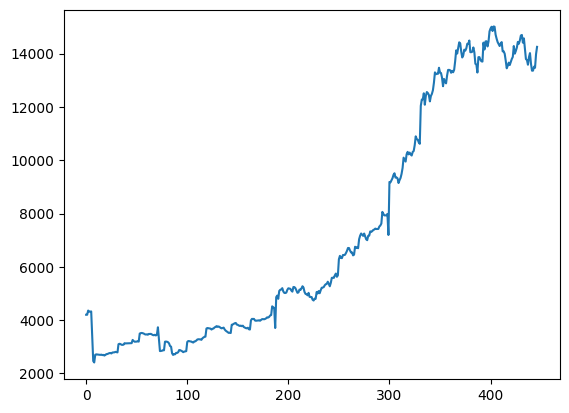

In [112]:
df.value_held.plot()

In [113]:
# Define the local endpoint
endpoint = "http://127.0.0.1:8000/transactions/list/?="

# Make a GET request to the local endpoint
response = requests.get(endpoint)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract the 'data' part
    df = pd.DataFrame(data["data"])
    # Convert numeric columns from strings to float (if needed)
    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

    id     type  user        date   amount currency ticker    shares metadata
0  306  deposit   1.0  2022-02-17  2100.00      EUR   None      None       {}
1  308  deposit   2.0  2022-02-18   400.00      EUR   None      None       {}
2  318     sell   NaN  2022-02-21   186.57      EUR   NVDA  1.000000       {}
3  294      fee   1.0  2022-02-25    -1.34      EUR   None      None       {}
4  295      fee   1.0  2022-02-25    -0.50      EUR   None      None       {}


In [114]:
import plotly.graph_objects as go

# Ensure 'date' is datetime (already done in your df)
df['date'] = pd.to_datetime(df['date'])

# Sort by date (already done in df_sorted)
df_sorted = df.sort_values('date')

fig = go.Figure()

# Add timeline markers
fig.add_trace(go.Scatter(
    x=df_sorted['date'],
    y=[1]*len(df_sorted),
    mode='markers',
    marker=dict(symbol='line-ns-open', size=20, color='skyblue'),
    text=df_sorted['type'],
    hovertemplate='Date: %{x}<br>Type: %{text}<extra></extra>',
    showlegend=False
))

# Annotate each event type above the marker
for d, t in zip(df_sorted['date'], df_sorted['type']):
    fig.add_annotation(
        x=d, y=1.02, text=str(t),
        showarrow=False, yanchor='bottom', textangle=90, font=dict(size=10)
    )

fig.update_yaxes(visible=False)
fig.update_layout(
    height=200,
    xaxis_title='Date',
    title='Transaction Type Timeline',
    margin=dict(l=20, r=20, t=40, b=20)
)

fig.show()